In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("C:/Users/cod/Desktop/train.csv")
df_test = pd.read_csv("C:/Users/cod/Desktop/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
for col in df_test.columns:
    msg='column : {:<15} Percent of NaN value: {:.2f}'.format(col,100*(
                            df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId     Percent of NaN value: 0.00
column : Pclass          Percent of NaN value: 0.00
column : Name            Percent of NaN value: 0.00
column : Sex             Percent of NaN value: 0.00
column : Age             Percent of NaN value: 20.57
column : SibSp           Percent of NaN value: 0.00
column : Parch           Percent of NaN value: 0.00
column : Ticket          Percent of NaN value: 0.00
column : Fare            Percent of NaN value: 0.24
column : Cabin           Percent of NaN value: 78.23
column : Embarked        Percent of NaN value: 0.00


In [17]:
for col in df_test.columns:
    msg='column : {:<15} Percent of NaN value: {:.2f}'.format(col,
                            100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId     Percent of NaN value: 0.00
column : Pclass          Percent of NaN value: 0.00
column : Name            Percent of NaN value: 0.00
column : Sex             Percent of NaN value: 0.00
column : Age             Percent of NaN value: 20.57
column : SibSp           Percent of NaN value: 0.00
column : Parch           Percent of NaN value: 0.00
column : Ticket          Percent of NaN value: 0.00
column : Fare            Percent of NaN value: 0.24
column : Cabin           Percent of NaN value: 78.23
column : Embarked        Percent of NaN value: 0.00


<AxesSubplot:>

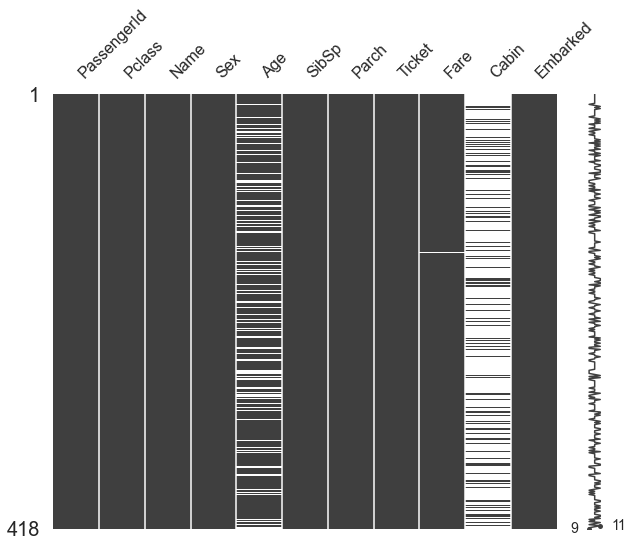

In [19]:
msno.matrix(df_test,figsize=(10,8))

<AxesSubplot:>

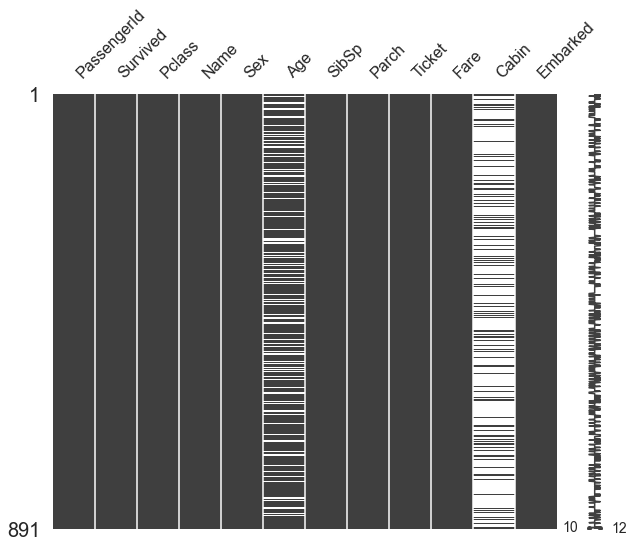

In [20]:
msno.matrix(df_train,figsize=(10,8))

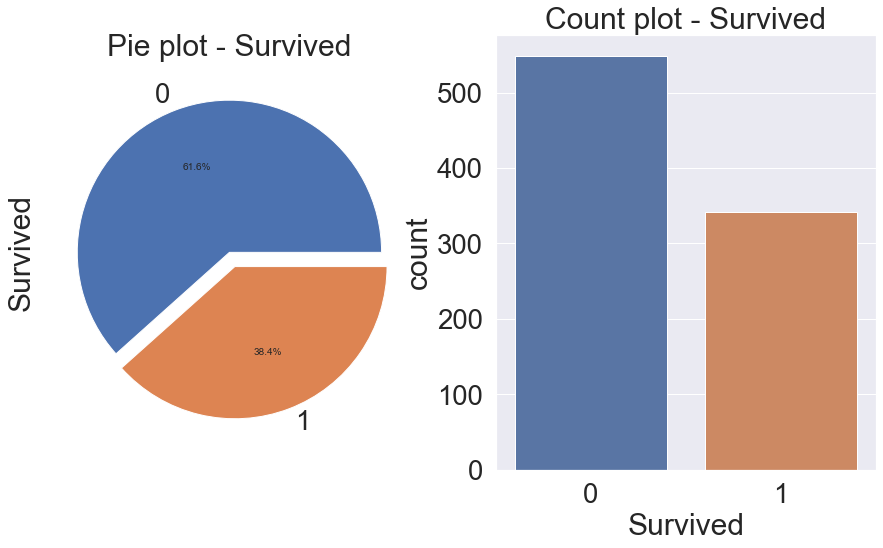

In [40]:
f,ax=plt.subplots(1,2,figsize=(15,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1]
                                             ,autopct='%0.1f%%',ax=ax[0])
ax[0].set_title('Pie plot - Survived')

sns.countplot(df_train['Survived'],ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [45]:
df_train[['Survived','Pclass']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [47]:
df_train[['Survived','Pclass']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [50]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

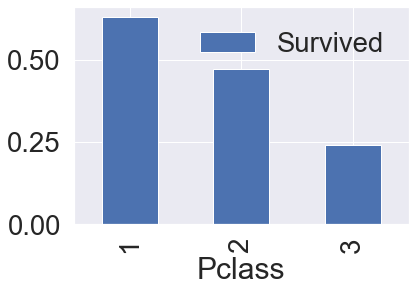

In [54]:
df_train[['Pclass','Survived']].groupby(['Pclass'],
                                        as_index=True).mean().sort_values(
                                        by='Survived',ascending=False).plot.bar()

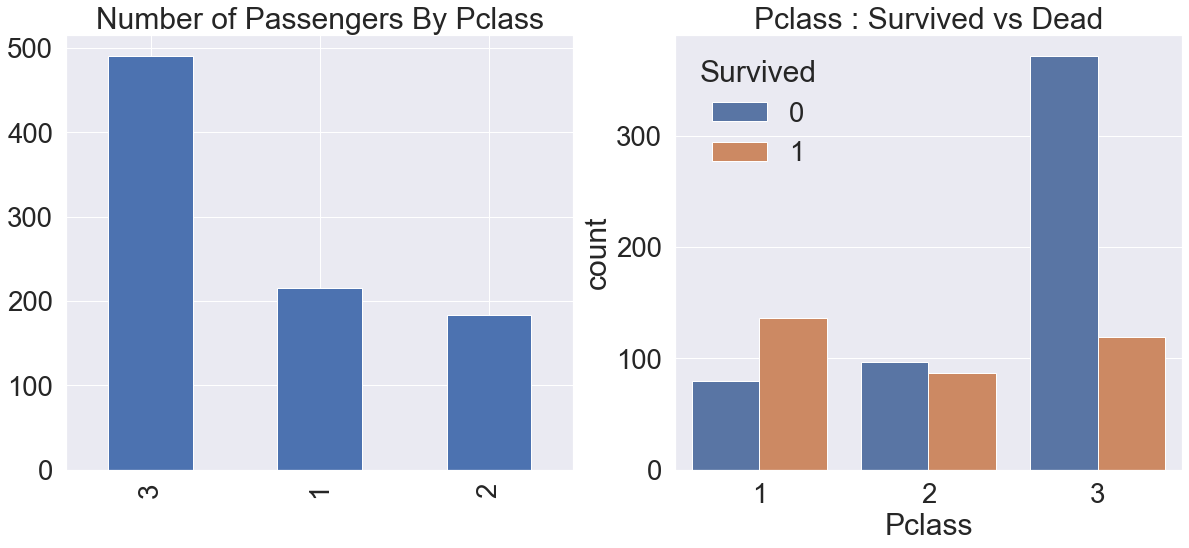

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
sns.countplot(df_train['Pclass'],hue=df_train['Survived'],ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')

plt.show()

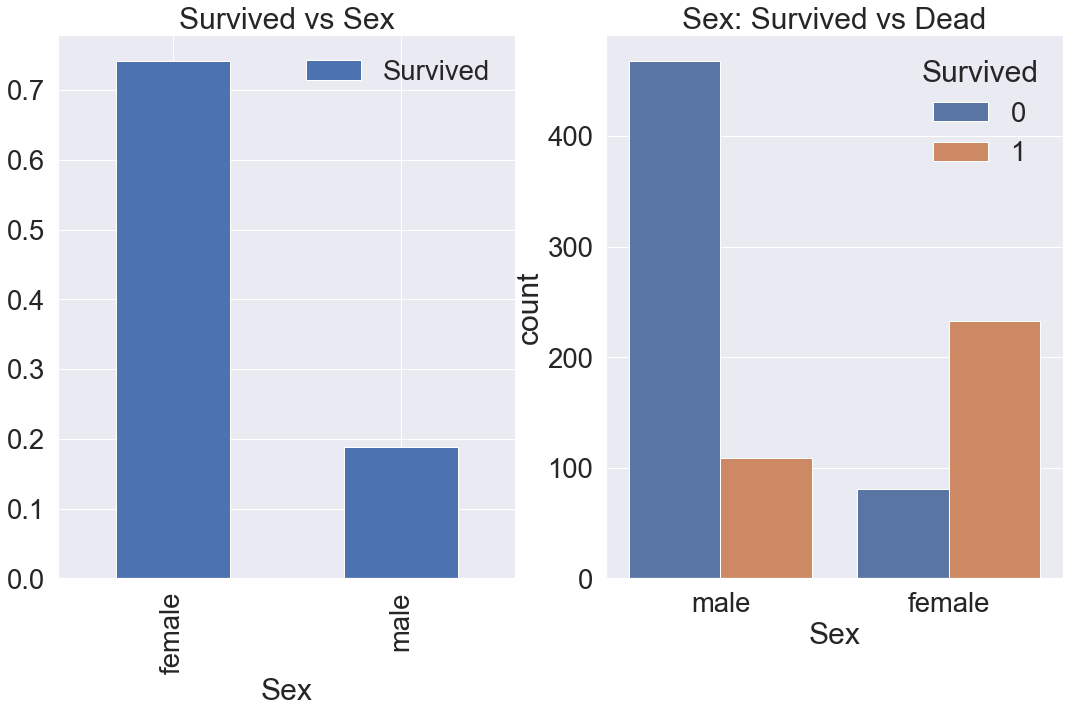

In [71]:
f,ax=plt.subplots(1,2,figsize=(18,10))

df_train[['Sex','Survived']].groupby(['Sex'],
                            as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [75]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [77]:
df_train[['Sex','Survived']].groupby(['Sex'],
            as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


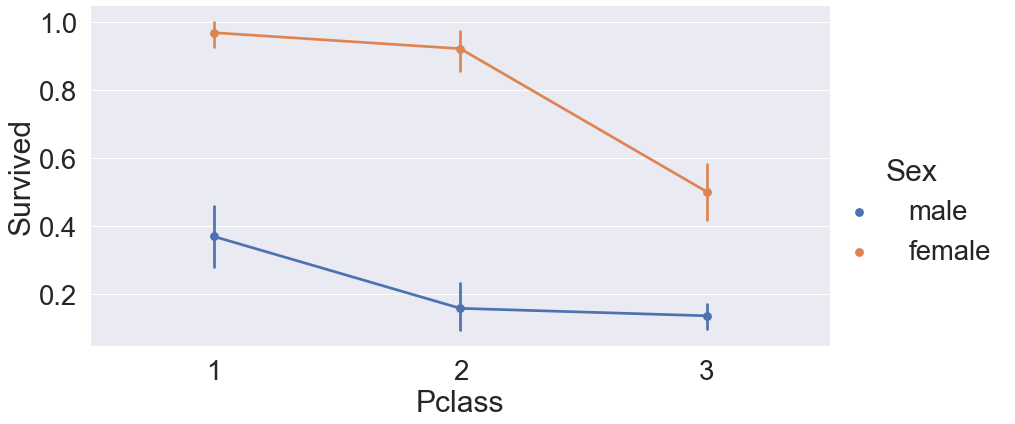

In [79]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=2)

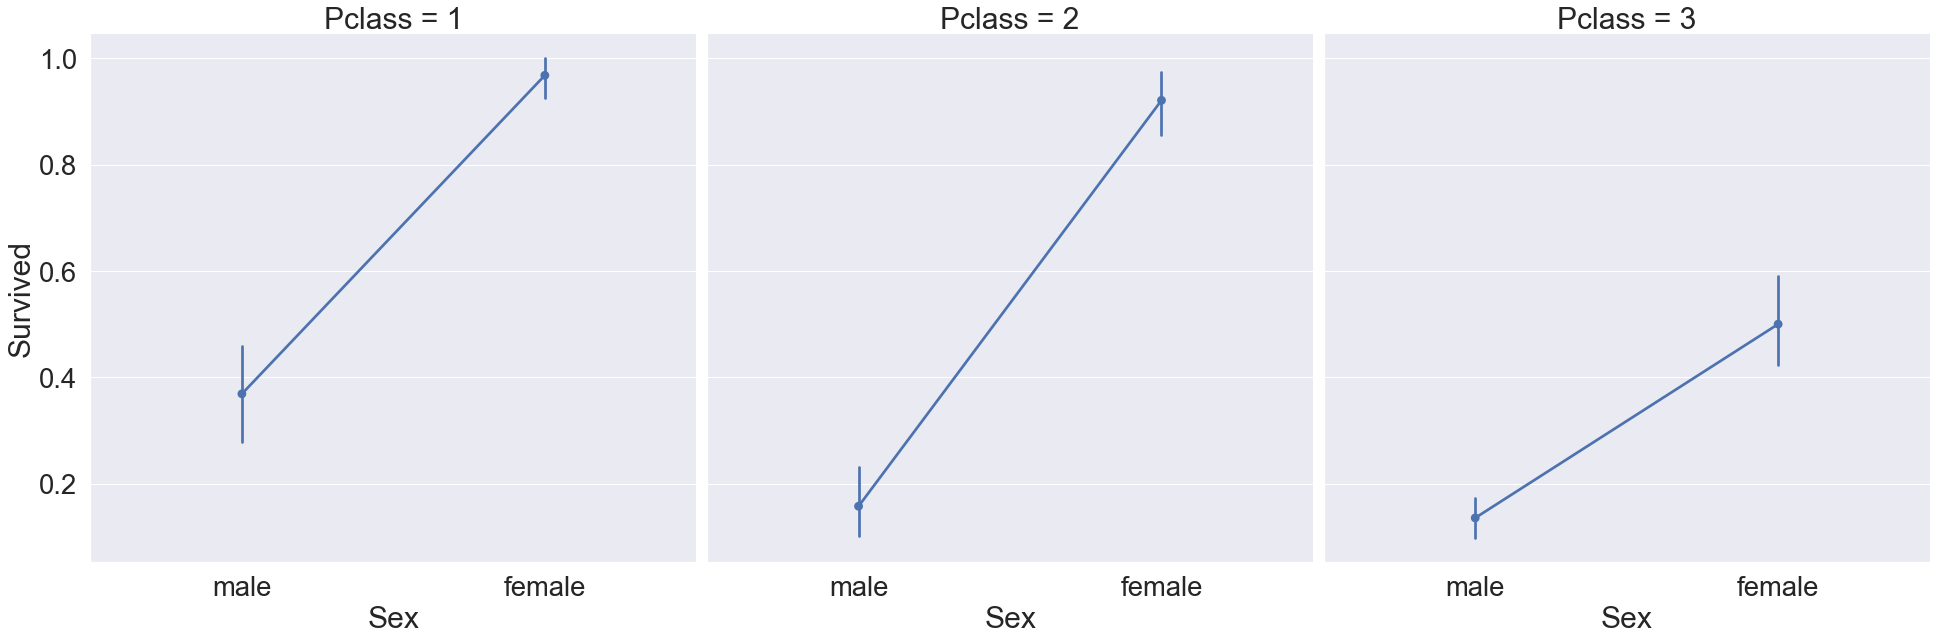

In [80]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=.5,
               size=9,aspect=1)

In [83]:
print('Oldest : {}'.format(df_train.Age.max()))
print('Youngest : {:.1f}'.format(df_train.Age.min()))
print('Mean : {:.1f}'.format(df_train.Age.mean()))

Oldest : 80.0
Youngest : 0.4
Mean : 29.7


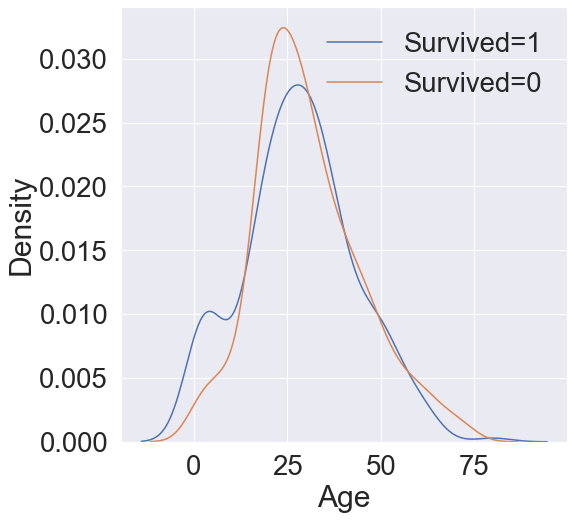

In [87]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived=1','Survived=0'])
plt.show()

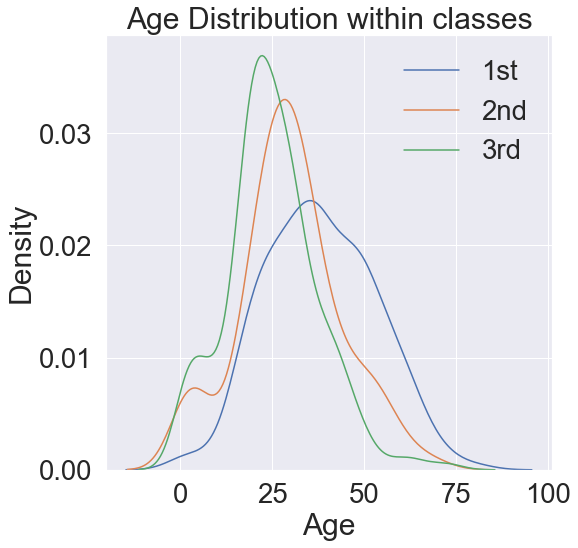

In [91]:
f,ax=plt.subplots(1,1,figsize=(8,8))
sns.kdeplot(df_train[df_train['Pclass']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==2]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==3]['Age'],ax=ax)
plt.title('Age Distribution within classes')
plt.xlabel('Age')
plt.legend(['1st','2nd','3rd'])
plt.show()

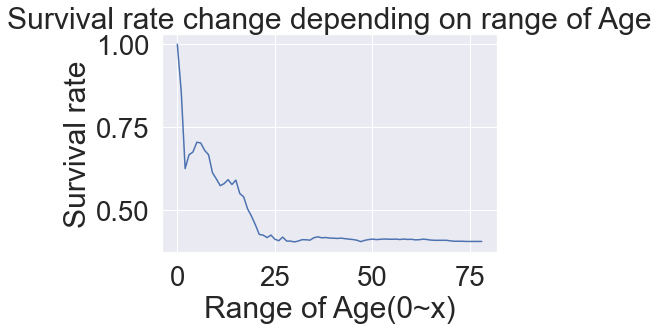

In [92]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/
                                   len(df_train[df_train['Age']<i]['Survived']))

plt.figsize=(8,8)
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()




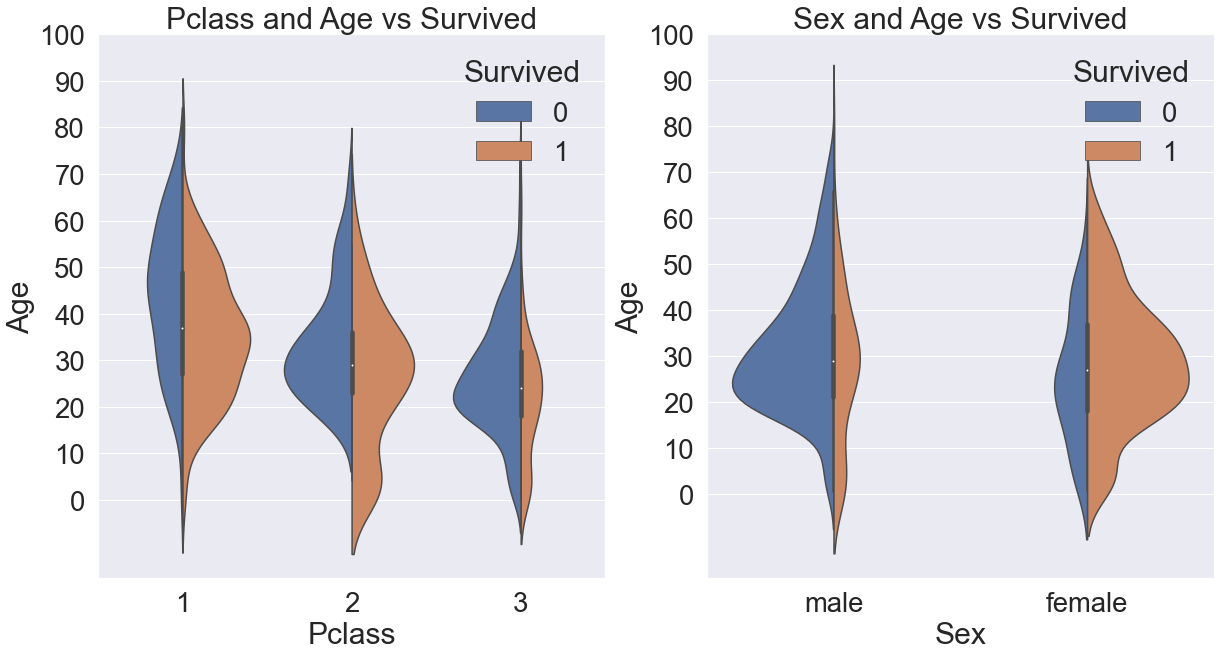

In [109]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.violinplot('Pclass','Age',data=df_train,hue='Survived',scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',data=df_train,hue='Survived',scale='count',ax=ax[1],split=True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))


plt.show()

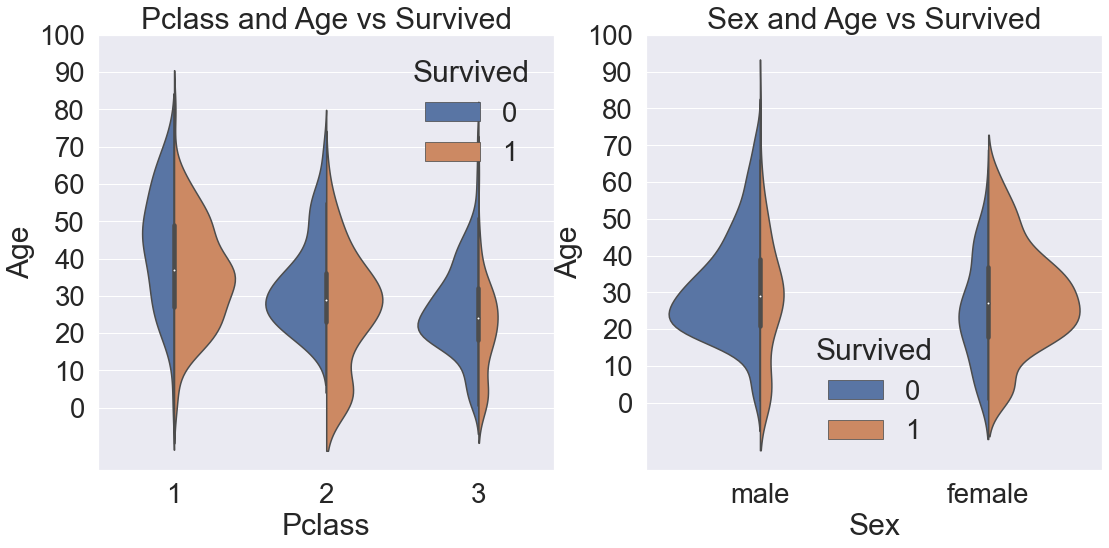

In [106]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()